In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer



In [8]:

data = pd.read_csv("C:\\Users\\uzman\\OneDrive\\Documents\\uzma py\\customer_churn.csv")

In [10]:
# Exploratory Data Analysis (EDA)
# Summary Statistics
print(data.describe())


       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [12]:
# Check for missing values
print(data.isnull().sum())


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


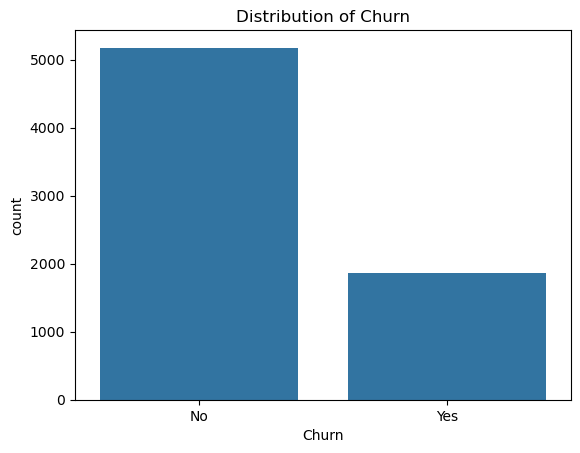

In [14]:
# Visualize distribution of target variable
sns.countplot(x='Churn', data=data)
plt.title('Distribution of Churn')
plt.show()

In [25]:
data.drop('customerID',axis=1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,-0.439916,1,0,-1.277445,0,1,0,0,2,0,0,0,0,0,1,2,-1.160323,2505,0
1,1,-0.439916,0,0,0.066327,1,0,0,2,0,2,0,0,0,1,0,3,-0.259629,1466,0
2,1,-0.439916,0,0,-1.236724,1,0,0,2,2,0,0,0,0,0,1,3,-0.362660,157,1
3,1,-0.439916,0,0,0.514251,0,1,0,2,0,2,2,0,0,1,0,0,-0.746535,1400,0
4,0,-0.439916,0,0,-1.236724,1,0,1,0,0,0,0,0,0,0,1,2,0.197365,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,-0.439916,1,1,-0.340876,1,2,0,2,0,2,2,2,2,1,1,3,0.665992,1597,0
7039,0,-0.439916,1,1,1.613701,1,2,1,0,2,2,0,2,2,1,1,1,1.277533,5698,0
7040,0,-0.439916,1,1,-0.870241,0,1,0,2,0,0,0,0,0,0,1,2,-1.168632,2994,0
7041,1,2.273159,1,0,-1.155283,1,2,1,0,0,0,0,0,0,0,1,3,0.320338,2660,1


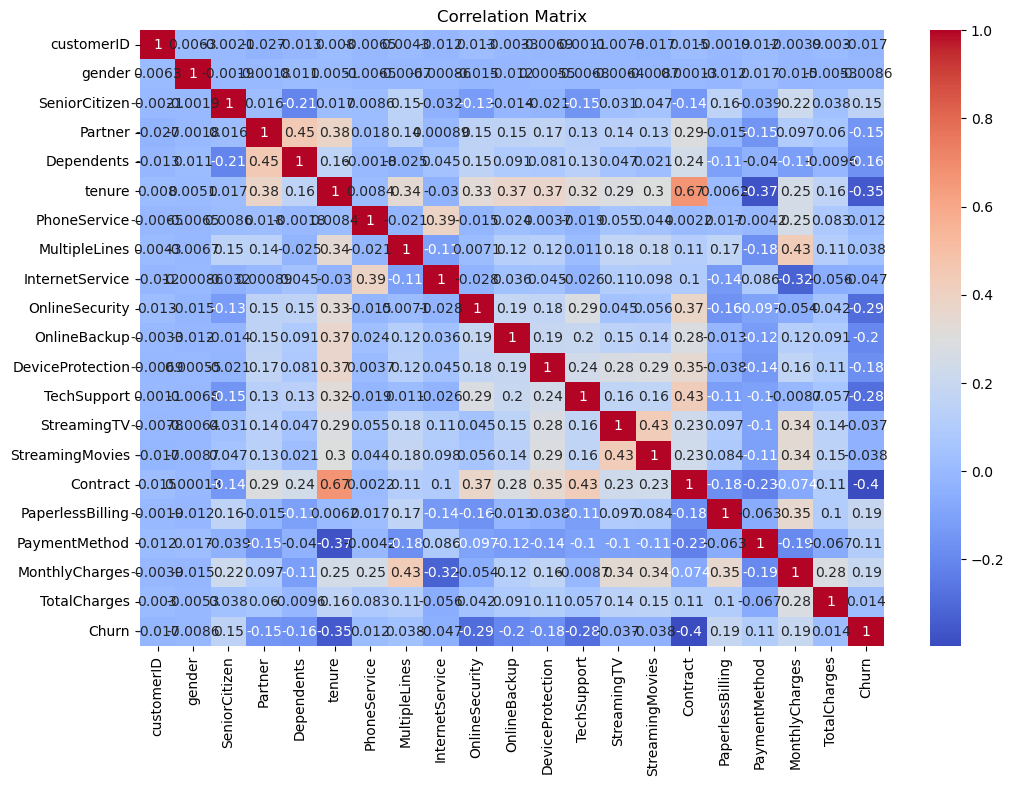

In [27]:
# Visualize correlations
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [29]:
# Feature Engineering
# Handle missing values
imputer = SimpleImputer(strategy='mean')
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)


In [31]:
# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [33]:
# Scale numerical features
scaler = StandardScaler()
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])


In [35]:
# Define features and target
X = data.drop('Churn', axis=1)
y = data['Churn']

In [62]:
y = y.astype(int)

In [64]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [66]:
# Train Models
# Logistic Regression
log_reg = LogisticRegression(max_iter=500, solver='lbfgs')
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [68]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)


RandomForestClassifier()

In [70]:
# Gradient Boosting
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)


GradientBoostingClassifier()

In [84]:
# Evaluate Models
models = {'Logistic Regression': log_reg, 'Random Forest': rf, 'Gradient Boosting': gb}
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f'{name} Model')
    print(classification_report(y_test, y_pred))
    print(f'ROC-AUC: {roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])}')
    print(confusion_matrix(y_test, y_pred))

Logistic Regression Model
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.68      0.56      0.61       373

    accuracy                           0.81      1409
   macro avg       0.77      0.73      0.75      1409
weighted avg       0.81      0.81      0.81      1409

ROC-AUC: 0.8606415684163673
[[940  96]
 [165 208]]
Random Forest Model
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1036
           1       0.66      0.51      0.58       373

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409

ROC-AUC: 0.8413042015588933
[[938  98]
 [181 192]]
Gradient Boosting Model
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1036
           1       0.68      0.52      0.59       373

    accura